<a href="https://colab.research.google.com/github/SarahWohlford/SW_Projects-in-Machine-Learning-and-AI_P/blob/main/HW2_Proj_ML_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sorry I forgot my data set on hw1

Here it is: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance

###Task 1 (30 points): Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Additionally, do the following:
- Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.




Saving student_habits_performance.csv to student_habits_performance (6).csv


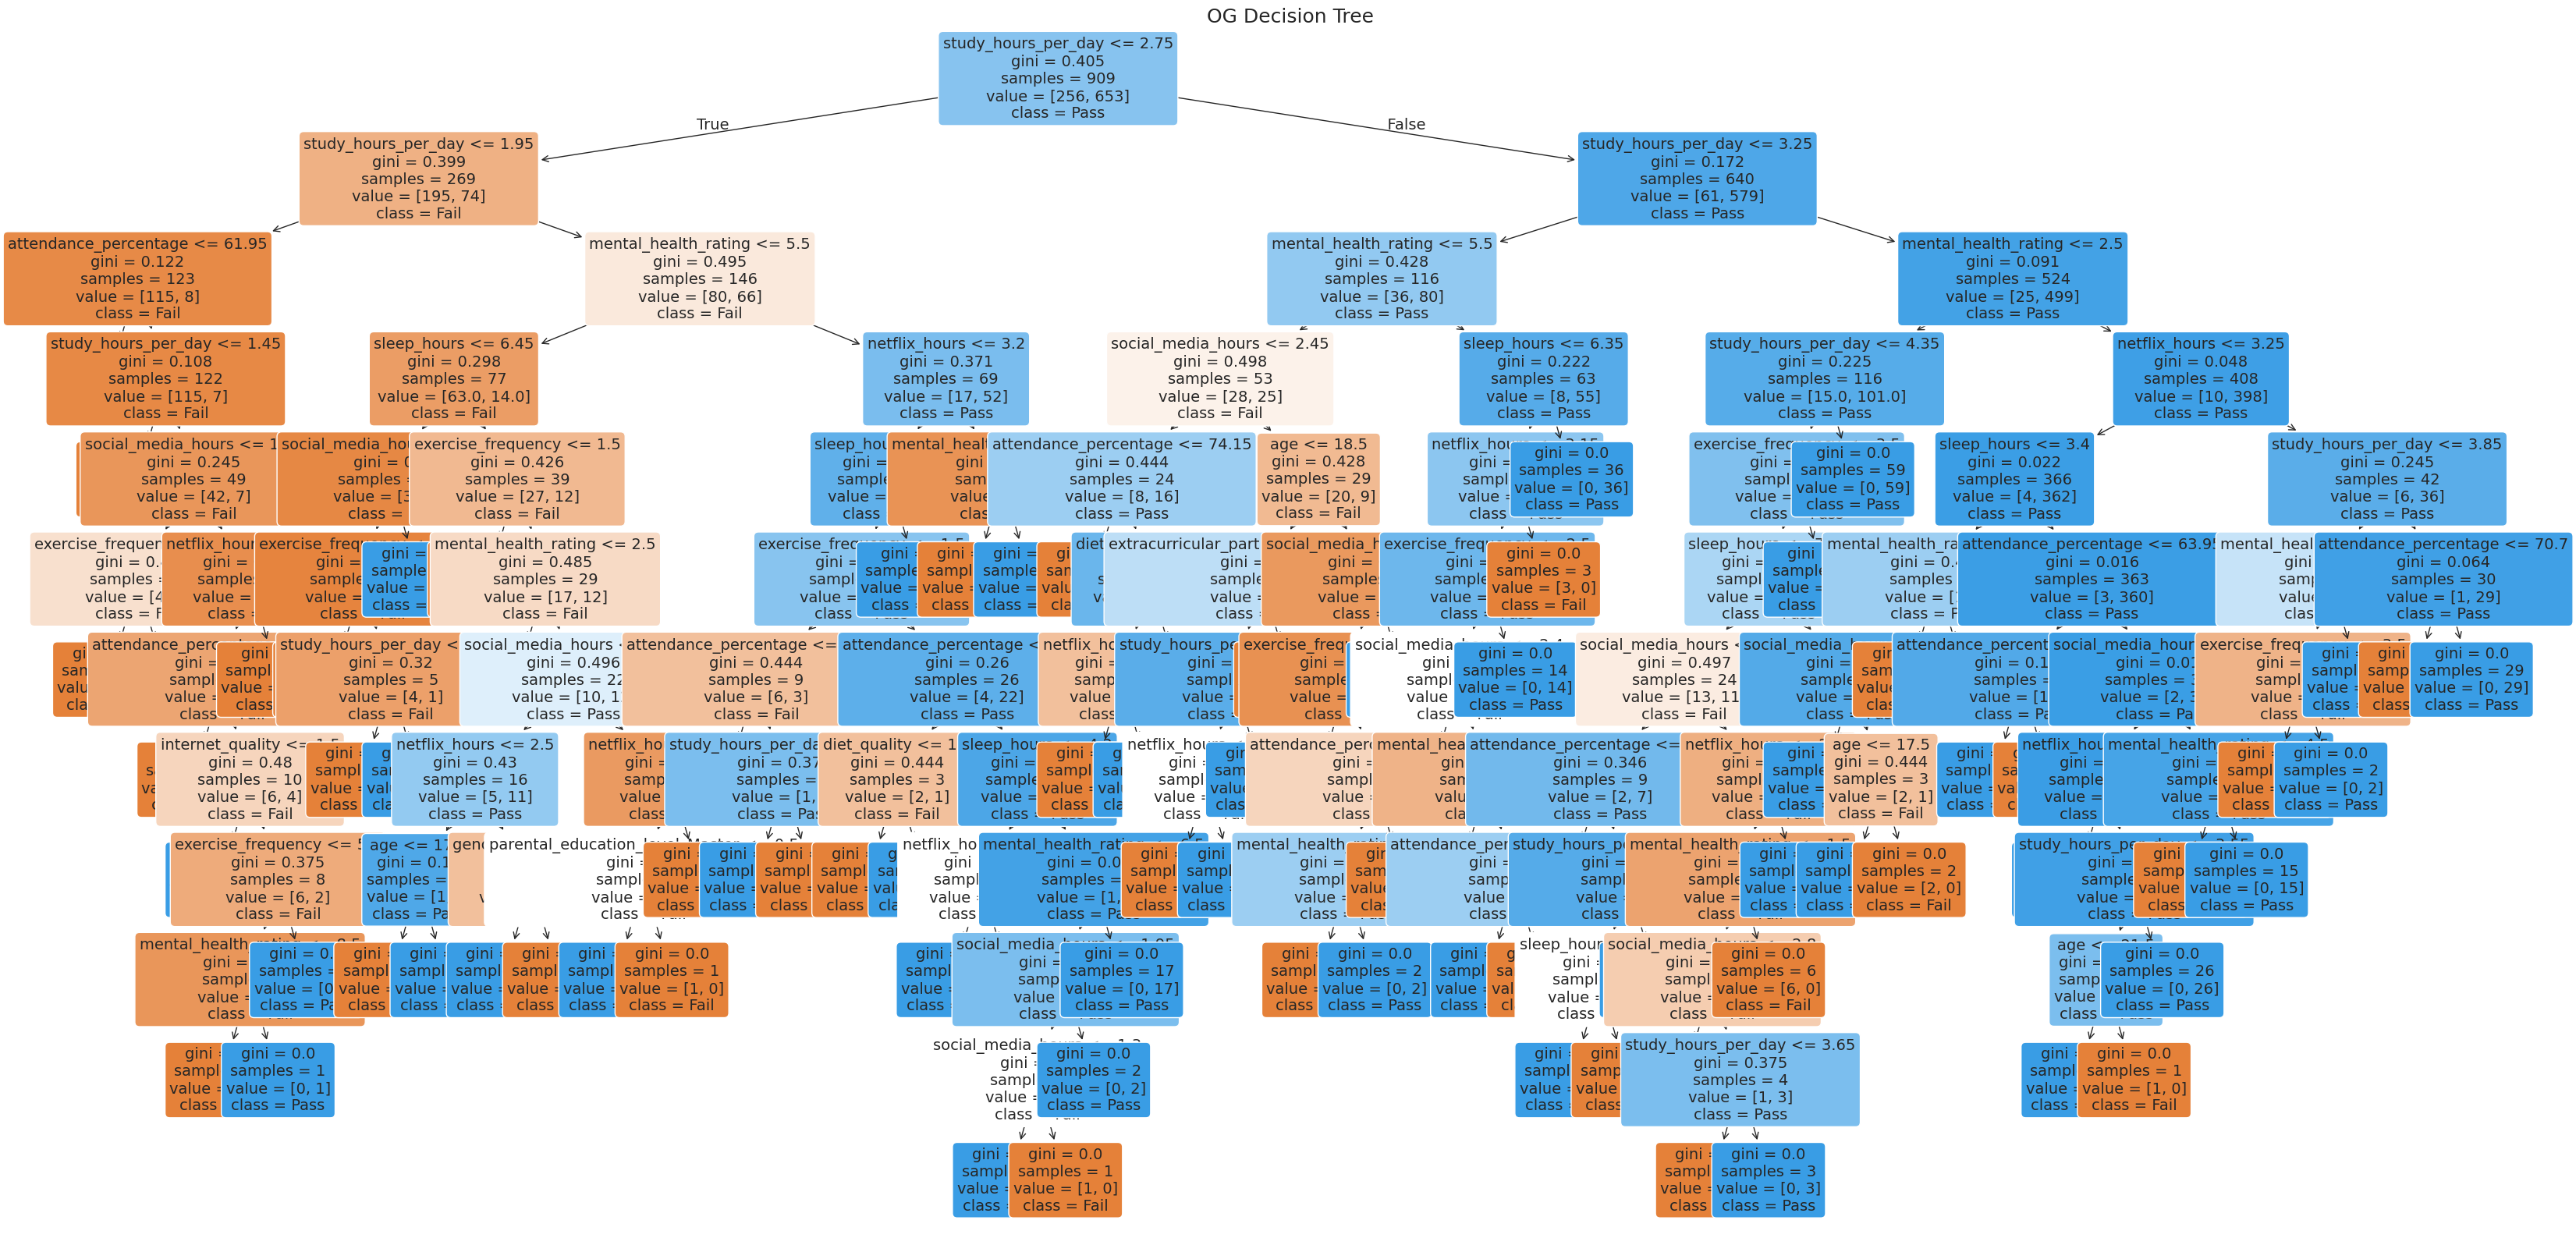

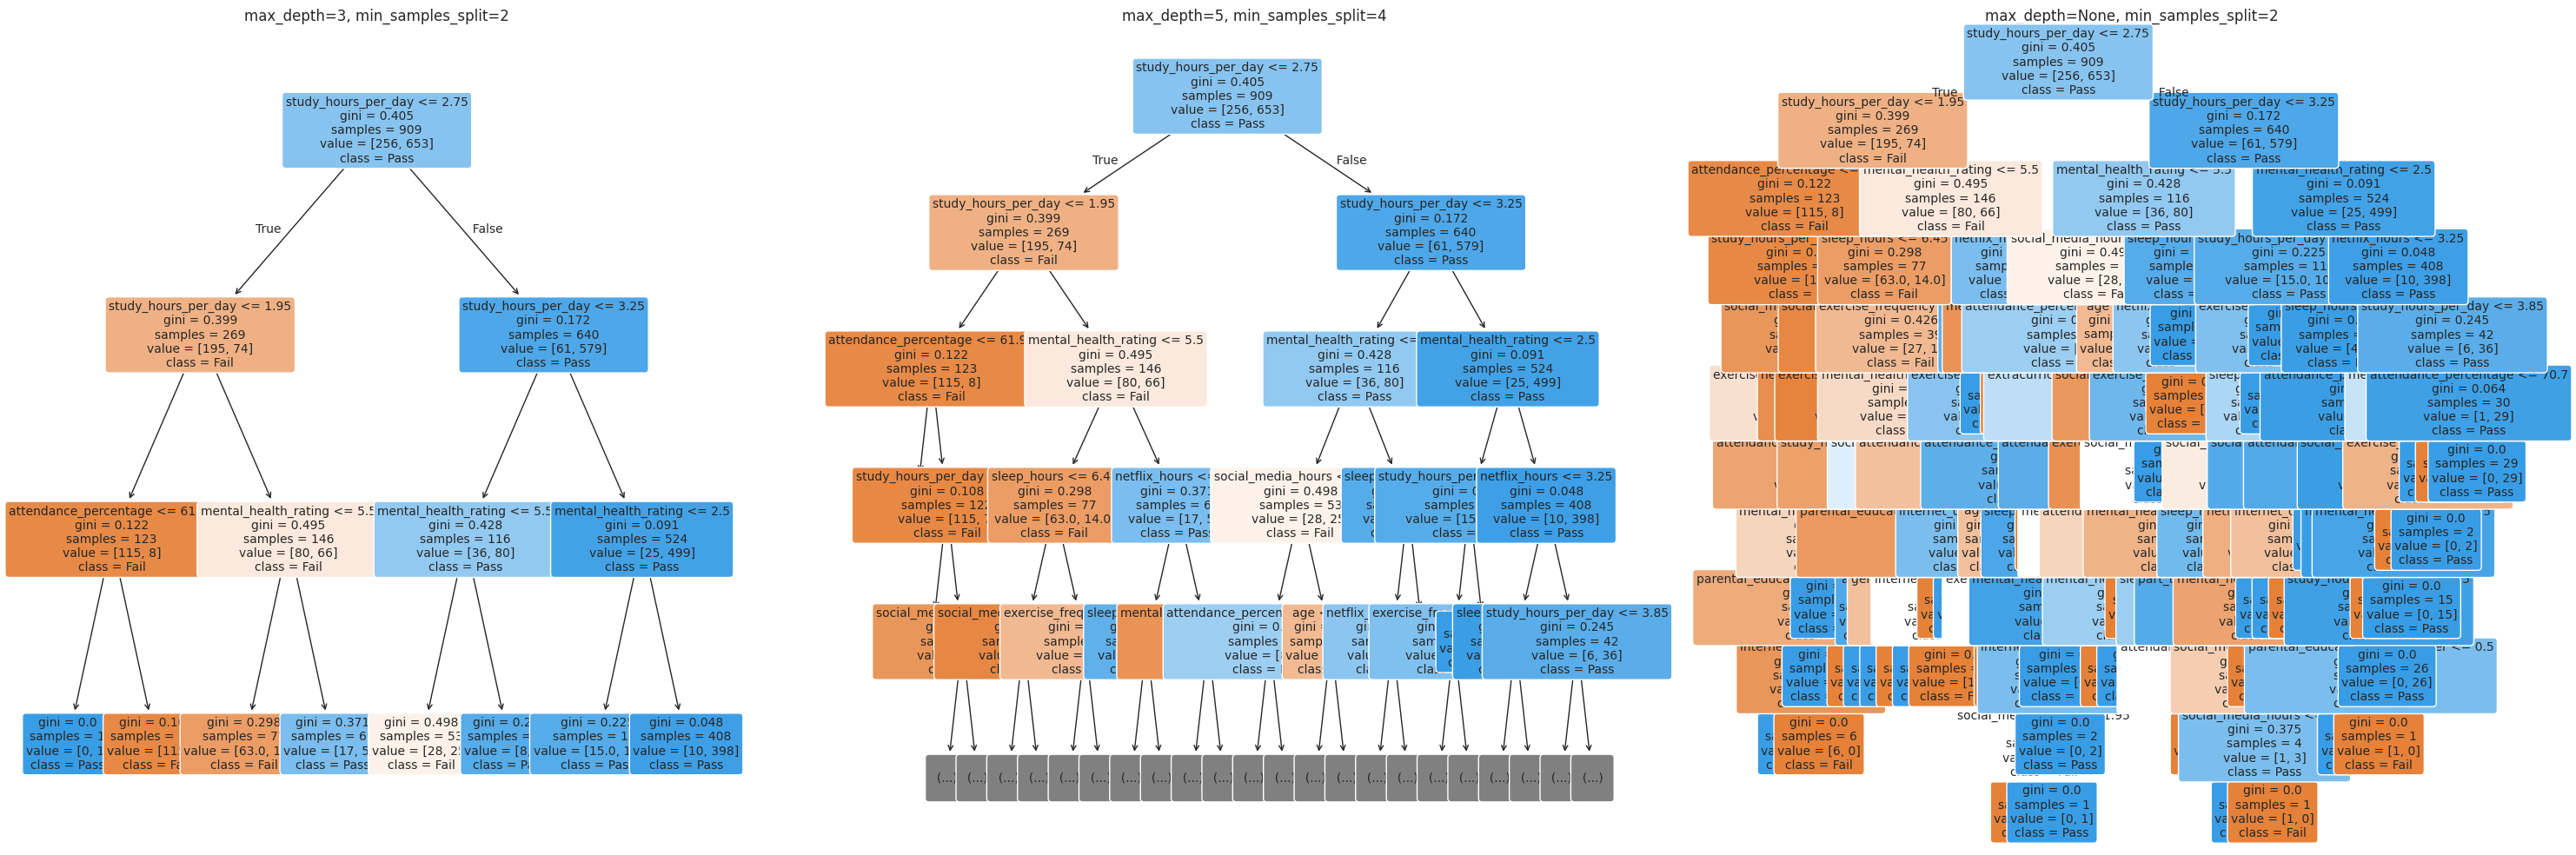

In [19]:
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
!pip install SALib
from sklearn.preprocessing import MinMaxScaler
from SALib.sample import saltelli
from SALib.analyze import sobol
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import ttest_rel

# Upload the data
from google.colab import files
uploaded = files.upload()

# Load dataset
data = pd.read_csv("student_habits_performance.csv")

# Convert exam_score to binary target (pass/fail)
data['pass_fail'] = np.where(data['exam_score'] >= 60, 1, 0)

# Drop unneeded columns
data.drop(columns=['student_id', 'exam_score'], inplace=True)

# Encode categorical columns
data_hold = {
    'diet_quality': {'Poor': 0, 'Fair': 1, 'Good': 2},
    'internet_quality': {'Poor': 0, 'Average': 1, 'Good': 2}
}
data.replace(data_hold, inplace=True)

# Drop rows with missing values
data.dropna(inplace=True)

# Convert specific columns to numeric
numeric_cols = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'diet_quality',
    'exercise_frequency', 'mental_health_rating', 'internet_quality'
]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dropna(inplace=True)

# One-hot encode boolean and categorical columns
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'part_time_job', 'parental_education_level', 'extracurricular_participation'
], drop_first=True)

# Make sure boolean columns are integers
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

#_____All above this point is data processing from hw 1___________

# Separate features and target so all not pass_fail and just pass_fail
X = data_encoded.drop(columns=['pass_fail'])
y = data_encoded['pass_fail']

# Initialize decision tree
classification_tree = tree.DecisionTreeClassifier()

# Train decision tree
classification_tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(40, 20))

tree.plot_tree(
    classification_tree,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    fontsize=14
)
plt.title("OG Decision Tree", fontsize=18)
plt.show()

#First Tre
tree1 = tree.DecisionTreeClassifier(random_state=16, max_depth=3, min_samples_split=2)
tree1.fit(X, y)

# Second Tree
tree2 = tree.DecisionTreeClassifier(random_state=16, max_depth=5, min_samples_split=4)
tree2.fit(X, y)

# Third Tree
tree3 = tree.DecisionTreeClassifier(random_state=16, max_depth=None, min_samples_split=2)
tree3.fit(X, y)

# Plot all trees
plt.figure(figsize=(30, 10))

# Plot Tree 1
plt.subplot(1, 3, 1)
tree.plot_tree(
    tree1,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=10
)
plt.title("max_depth=3, min_samples_split=2")

# Plot Tree 2
plt.subplot(1, 3, 2)
tree.plot_tree(
    tree2,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    max_depth=4,
    fontsize=10
)
plt.title("max_depth=5, min_samples_split=4")

# Plot Tree 3
plt.subplot(1, 3, 3)
tree.plot_tree(
    tree3,
    feature_names=X.columns,
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True,
    max_depth=None,
    fontsize=10
)
plt.title("max_depth=None, min_samples_split=2")
plt.tight_layout()
plt.show()

Tree Complexity:
- Max_depth = 3: Easier to read and simpler to understand. So its easier interpret but may underfit. Splits only on most important features (study hours, mental helth rating.

- max_depth = 5: Good balance of accuracy and interpretability. More acurate then depth 3 but easier to understand than the last

- max_depth = None: my visulization is not great would possibly be better more spread out. more accurate but also more likely to overfit because at the end it has lots of branches.

- Do some research on what sensitivity analysis is and how it is performed (include
citations). Perform a sensitivity analysis to measure the impact of at least two input
features on your model's decision boundary.

                                            ST   ST_conf
age                                   0.012553  0.014170
study_hours_per_day                   0.753187  0.093086
social_media_hours                    0.129716  0.043091
netflix_hours                         0.297091  0.058388
attendance_percentage                 0.355672  0.065926
sleep_hours                           0.087872  0.040159
diet_quality                          0.000000  0.000000
exercise_frequency                    0.046028  0.024845
internet_quality                      0.008369  0.010858
mental_health_rating                  0.271984  0.055675
gender_Male                           0.000000  0.000000
gender_Other                          0.000000  0.000000
part_time_job_Yes                     0.004184  0.010277
parental_education_level_High School  0.004184  0.008938
parental_education_level_Master       0.000000  0.000000
extracurricular_participation_Yes     0.000000  0.000000
                               

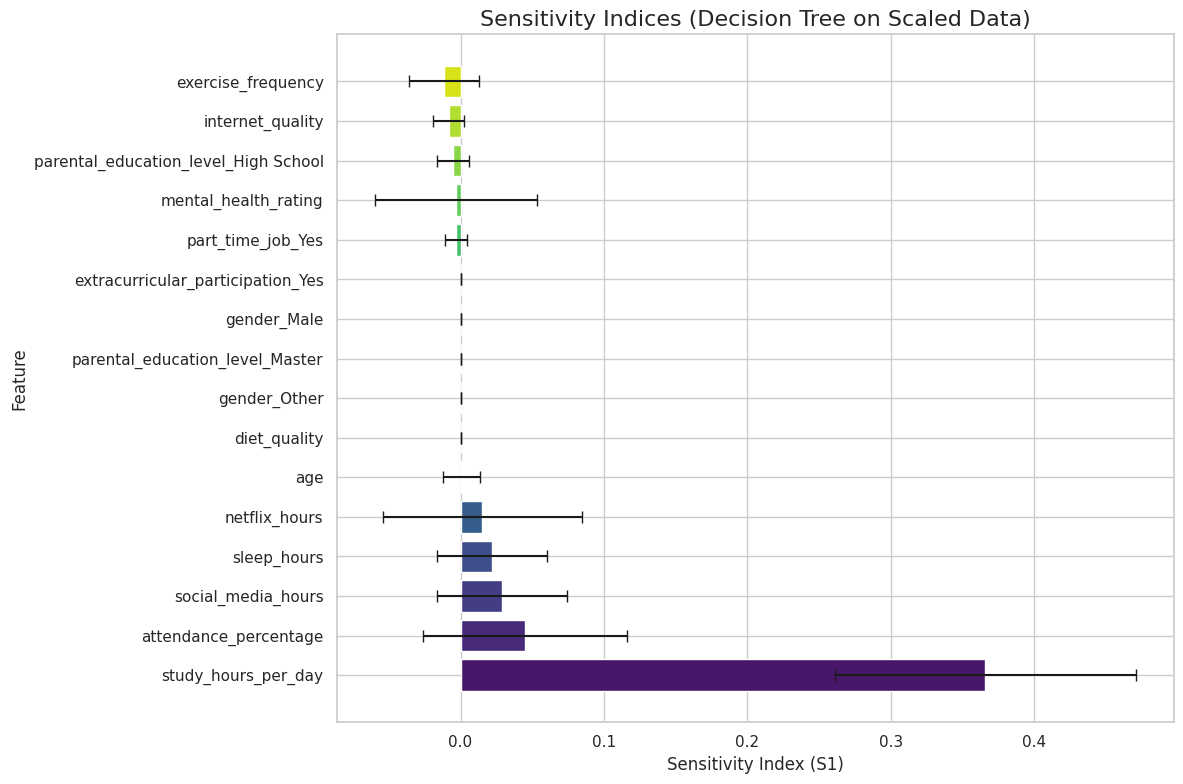

In [20]:
# Normalize features for sensitivity analysis
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Define the prob for SALib
problem = {
    'num_vars': X_scaled.shape[1],
    'names': list(X_scaled.columns),
    'bounds': [[0, 1]] * X_scaled.shape[1]
}

# Generate Saltelli samples
param_values = saltelli.sample(problem, 512, calc_second_order=False)

# Train the decision tree
scaled_classification_tree = DecisionTreeClassifier(random_state=16)
scaled_classification_tree.fit(X_scaled, y)

# Predict on Saltelli samples
Y = scaled_classification_tree.predict(param_values).astype(float)

# Run sensitivity analysis
sobol_indices = sobol.analyze(problem, Y, print_to_console=True, calc_second_order=False)

# Extract first order indices and confidence intervals
s1 = pd.Series(sobol_indices['S1'], index=problem['names'])
s1_conf = pd.Series(sobol_indices['S1_conf'], index=problem['names'])

plt.figure(figsize=(12, 8))
s1_sorted = s1.sort_values(ascending=False)
s1_conf_sorted = s1_conf[s1_sorted.index]

plt.barh(
    s1_sorted.index,
    s1_sorted.values,
    xerr=s1_conf_sorted.values,
    capsize=4,
    color=sns.color_palette("viridis", len(s1_sorted))
)

plt.title("Sensitivity Indices (Decision Tree on Scaled Data)", fontsize=16)
plt.xlabel("Sensitivity Index (S1)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



Sources:

https://salib.readthedocs.io/en/latest/user_guide/basics.html#an-example

https://notebook.community/Leguark/pynoddy/docs/notebooks/9-Sensitivity-Analysis

https://salib.readthedocs.io/en/latest/api/SALib.analyze.html

https://machinelearninggeek.com/sensitivity-analysis-in-python/

https://medium.com/@einat_93627/understand-your-black-box-model-using-sensitivity-analysis-practical-guide-ef6ac4175e55

https://projecteuclid.org/journals/annals-of-statistics/volume-29/issue-5/Greedy-function-approximation-A-gradient-boosting-machine/10.1214/aos/1013203451.full

https://mooseframework.inl.gov/modules/stochastic_tools/examples/sobol.html

Sensitivity analysis purpose overall: helps understand how the output of a model changes when features vary.


About my results: study_hours_per_day is the most influential feature(high total-order index (ST = 0.75) and first-order index (S1 = 0.37)) Showing it has a direct effect on sudent performance. Other contributors: attendance_percentage, netflix_hours, and mental_health_rating(high total effects but low first-order indices) so their comes through interactions with other variables. social_media_hours and sleep_hours have lower effects, and demographic and lifestyle variables like gender, diet_quality, extracurricular_participation, and parental_education_level exhibit almoste none or zero influence. Some negative S1 values may happen becuase of estimation noise and are probably not significant. Overall, study habits and engagement related features(social media, ect) impact the model's behavior the most.

###Task 2 (30 points): From the Bagging and Boosting ensemble methods pick any one algorithm from each category. Implement both the algorithms using the same data.  


In [21]:
#features and target from above
# X, y

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Bagging: Random Forest
rf_model = RandomForestClassifier(random_state=16)
rf_scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Random Forest (Bagging) Accuracy: %.3f' % (mean(rf_scores)))

# Boosting: AdaBoost
ada_model = AdaBoostClassifier(random_state=16)
ada_scores = cross_val_score(ada_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('AdaBoost (Boosting) Accuracy: %.3f' % (mean(ada_scores)))

Random Forest (Bagging) Accuracy: 0.906
AdaBoost (Boosting) Accuracy: 0.904


About my results: Random Forests 90.6% accuracy is slightly higher than AdaBoosts 90.4% no significant difference between them. So both models are effective for my dataset.

###Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15). You may do your own research on this technique (include citations).

In [22]:
# folds
folds = [5, 10, 15]

# Evaluate using each fold
for k in folds:
    print(f"\n{k}")

    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=16)

    # Bagging: Random Forest
    #Recalulate
    rf_model = RandomForestClassifier(random_state=16)

    rf_scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
    print(f"Random Forest Accuracy: {mean(rf_scores):.3f}")

    #Recaluculate
    # Boosting: AdaBoost
    ada_model = AdaBoostClassifier(random_state=16)
    ada_scores = cross_val_score(ada_model, X, y, scoring='accuracy', cv=skf, n_jobs=-1)
    print(f"AdaBoost Accuracy: {mean(ada_scores):.3f}")



5
Random Forest Accuracy: 0.902
AdaBoost Accuracy: 0.898

10
Random Forest Accuracy: 0.900
AdaBoost Accuracy: 0.912

15
Random Forest Accuracy: 0.899
AdaBoost Accuracy: 0.904


https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/

https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html

Result anlysis: 5 for Random forest is the most acurate but the least acurate for AdaBoost. 10 is the second most acurate for Random forest and the most acurate for AdaBoost. 15 is the least accurate for Random forest and the second most acurate for AdaBoost. All acuracy are very close though so this again dosent effect too much.

###- Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy, Precision, F1-score etc.).  

In [23]:
# Define eval metrics
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Choose fold setting
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Models
models = {
    'Random Forest (Bagging)': RandomForestClassifier(random_state=16),
    'AdaBoost (Boosting)': AdaBoostClassifier(random_state=16)
}

# Evaluate each model using each metric
for name, model in models.items():
    print(f"\n{name} Evaluation with Stratified {k}-Fold CV:")

    for metric_name, scorer in scoring_metrics.items():
        scores = cross_val_score(model, X, y, scoring=scorer, cv=skf, n_jobs=-1)
        print(f"{metric_name.capitalize()}: {scores.mean():.3f}")



Random Forest (Bagging) Evaluation with Stratified 10-Fold CV:
Accuracy: 0.902
Precision: 0.912
F1: 0.934

AdaBoost (Boosting) Evaluation with Stratified 10-Fold CV:
Accuracy: 0.903
Precision: 0.926
F1: 0.934


Result analysis: Both Random Forest (Bagging) and AdaBoost (Boosting) performed similarly under stratified 10-fold cross-validation. Random Forest had an accuracy of 0.902, precision of 0.912, and F1 score of 0.934. AdaBoost had a slightly better accuracy(0.903), higher precision(0.926), and the same F1 score. So AdaBoost had slightly better precision, but both models are pretty equal overall.

###- Comment on the behavior of each algorithm under the metrics. Does the performance ranking change based on the metric used? Why?

The performance ranking of the algorithms changes only slightly depending on the metric used. While AdaBoost achieves slightly higher accuracy (0.903 vs. 0.902) and precision (0.926 vs. 0.912) than Random Forest, both models have the same F1 score (0.934), so they balance precision and sensitvity equally well. AdaBoosts higher persision means it made fewer false positives than random forest. Also because they had the same F1-score, and f1-score balances the trade offs between precision and accuracy. So Random forest could be better for accuracy. Overall choosing the better model depends on which metrics are more important for a data set: minimizing false positives, or F1 for overall balance. They were very close overall so they both worked well for my data.



### Task 3 (40 points): Compare the effectiveness of the three models implemented above. Analyze the results using the following:
- A confusion matrix for one selected test fold.   

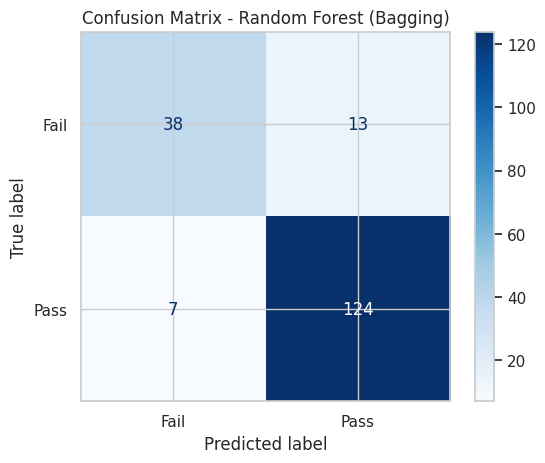

In [24]:
# Split once for confusion matrix visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit and predict with Random Forest
rf_model = RandomForestClassifier(random_state=16)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest (Bagging)")
plt.show()


Results anaysis: Random Forest model works well, particularly at identifying students who will pass. However, it sometimes misclassifies failing students as passing (13 times), which could be importaint in some cases like possibly a academic risk assessment. Overall, the model is accurate and but slightly favors the Pass

- A statistical test (e.g., paired t-test) to determine if differences between models are significant.

In [25]:
# Setup for
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# accuracy scores
rf_scores = cross_val_score(RandomForestClassifier(random_state=16), X, y, scoring='accuracy', cv=cv)
ada_scores = cross_val_score(AdaBoostClassifier(random_state=16), X, y, scoring='accuracy', cv=cv)

# t-test
t_stat, p_value = ttest_rel(rf_scores, ada_scores)

Results anaysis: p val is greater than so 0.05 no significant difference found

### - Trade-off between bias and variance for each model.

- Bagging Random Forest:
  - Reduce variance by clustering multiple trees trained on different samples this reduces variance
  - Less likley to overfit than a single tree
  - Maintains relatively low bias

- Boosting AdaBoost:
  - Builds trees sequentialy focusing on correcting erros
  - Focuses on reducing bias by sequentially correcting mistakes(high accuracy)
  - Can sometimes overfit but usually achieves high accuracy
  - Sensitive to outliers

- Reg Decision Tree:
  - Low bias but high variance, especially when deep
  - Simple to interpret but often underperforms compared to others